In [5]:
import pandas as pd

## DATA

In [6]:
Customerdata=pd.read_csv('Customer-Churn-Records.csv')

In [7]:
Customerdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
Customerdata.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [9]:
Customerdata.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [10]:
df=Customerdata.copy()

### 資料預處理

In [11]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [12]:
# 將類別資料做單熱編碼
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'])

# 移除不需要欄位
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

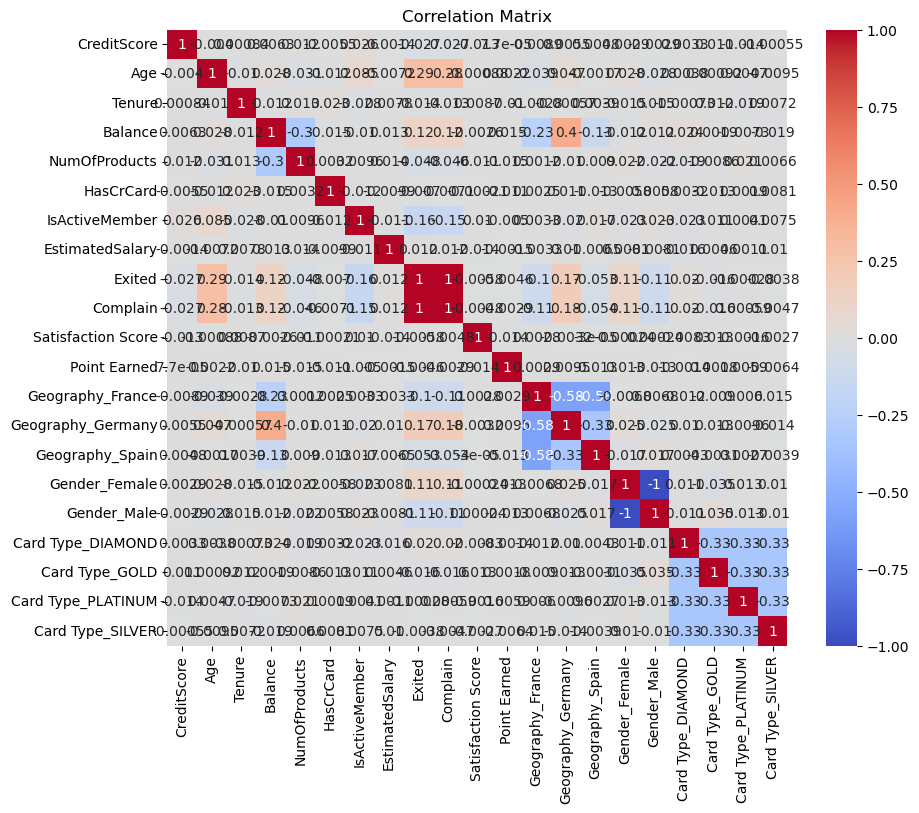

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# 相關係數矩陣
correlation_matrix = df.corr()

# 相關係數矩陣熱力圖
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 敘述性統計


In [14]:
# 離開率
churn_rate = df['Exited'].mean()
print('Churn Rate:', churn_rate)

Churn Rate: 0.2038


In [15]:
# 性別離開率
gender_churn = df.groupby('Gender_Male')['Exited'].mean()
print('Churn Rate by Gender:')
print(gender_churn)

Churn Rate by Gender:
Gender_Male
0    0.250715
1    0.164743
Name: Exited, dtype: float64


In [16]:
avg_balance_churned = df[df['Exited'] == 1]['Balance'].mean()
avg_balance_retained = df[df['Exited'] == 0]['Balance'].mean()
print('Average Balance : Churned:', avg_balance_churned)
print('Average Balance : Retained:', avg_balance_retained)

Average Balance : Churned: 91109.47600588812
Average Balance : Retained: 72742.75066314996


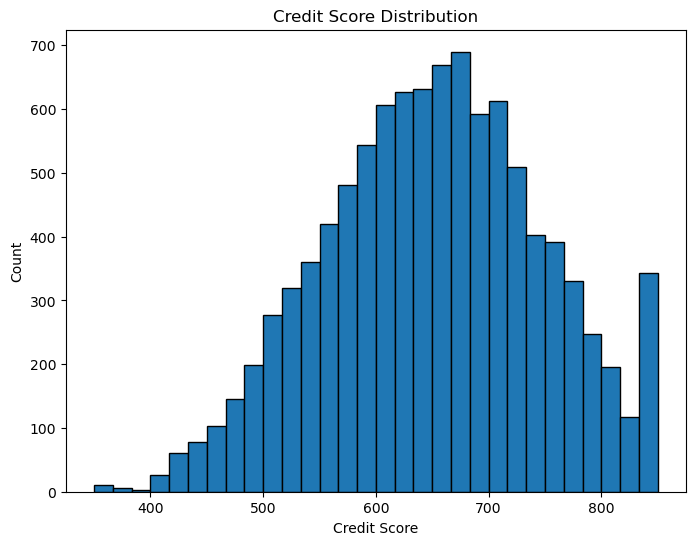

In [17]:
# 信用分布情況
plt.figure(figsize=(8, 6))
plt.title('Credit Score Distribution')
plt.hist(df['CreditScore'], bins=30, edgecolor='k')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

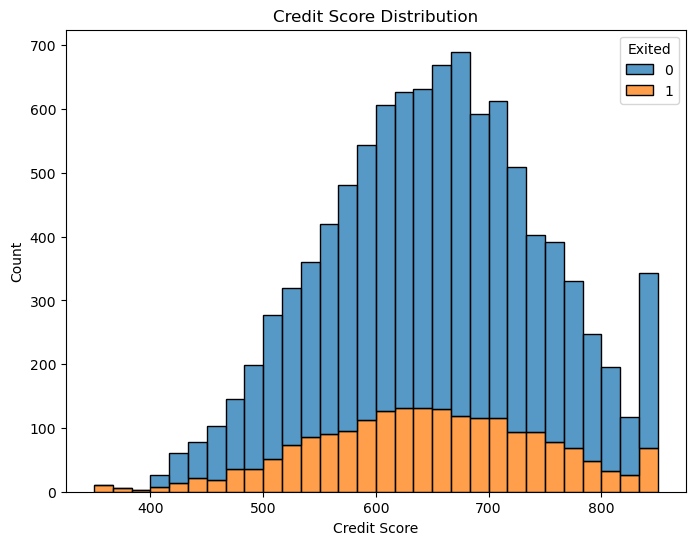

In [18]:
# 將有離開沒離開的信用分布狀況比較
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the stacked histograms using seaborn
sns.histplot(data=df, x='CreditScore', hue='Exited', multiple='stack', bins=30, edgecolor='k')

# Set the title and labels
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Count')

# Show the plot
plt.show()


## 建立模型

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# 分出特徵及目標
X = df.drop('Exited', axis=1)
y = df['Exited']

# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立模型
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machines": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

# 存儲每種模型的結果
results = {}



# 訓練和測試每種模型
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy

    # 計算混淆矩陣
    cm = confusion_matrix(y_test, predictions)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)

# 印出結果
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy}")



d:\Users\hanklee\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Confusion Matrix for Logistic Regression:
[[1568   39]
 [ 363   30]]
Confusion Matrix for Decision Tree:
[[1604    3]
 [   2  391]]
Confusion Matrix for Support Vector Machines:
[[1607    0]
 [ 393    0]]
Confusion Matrix for XGBoost:
[[1606    1]
 [   1  392]]
Logistic Regression: 0.799
Decision Tree: 0.9975
Support Vector Machines: 0.8035
XGBoost: 0.999


### 隨機森林 看一下重要特徵

Feature: CreditScore, Importance: 0.011269453002302246
Feature: Age, Importance: 0.06893506950004973
Feature: Tenure, Importance: 0.006373297946608637
Feature: Balance, Importance: 0.01625151544013153
Feature: NumOfProducts, Importance: 0.04969540458421729
Feature: HasCrCard, Importance: 0.0013821424640517391
Feature: IsActiveMember, Importance: 0.013504256312572656
Feature: EstimatedSalary, Importance: 0.010390955822042754
Feature: Complain, Importance: 0.7824284339017626
Feature: Satisfaction Score, Importance: 0.003889018867731645
Feature: Point Earned, Importance: 0.01153190166399914
Feature: Geography_France, Importance: 0.002665089112955341
Feature: Geography_Germany, Importance: 0.0102440668575883
Feature: Geography_Spain, Importance: 0.0013634398202869197
Feature: Gender_Female, Importance: 0.003042112723119831
Feature: Gender_Male, Importance: 0.002243301646444847
Feature: Card Type_DIAMOND, Importance: 0.0012467709823107756
Feature: Card Type_GOLD, Importance: 0.0013637541276

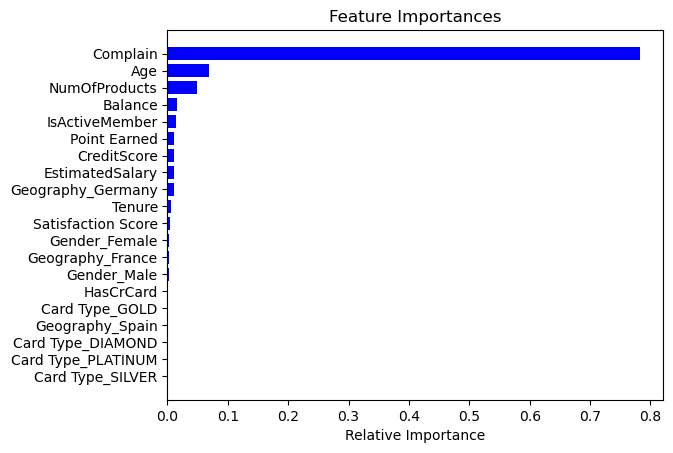

In [28]:
from sklearn.ensemble import RandomForestClassifier

# 訓練隨機森林模型
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 獲取特徵重要性
importances = model.feature_importances_

# 輸出特徵和相應的重要性
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")


# 將特徵重要性排序並繪圖
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### 在準確率都相當不錯的情況下 我選擇解釋性高的決策樹

Accuracy: 0.998


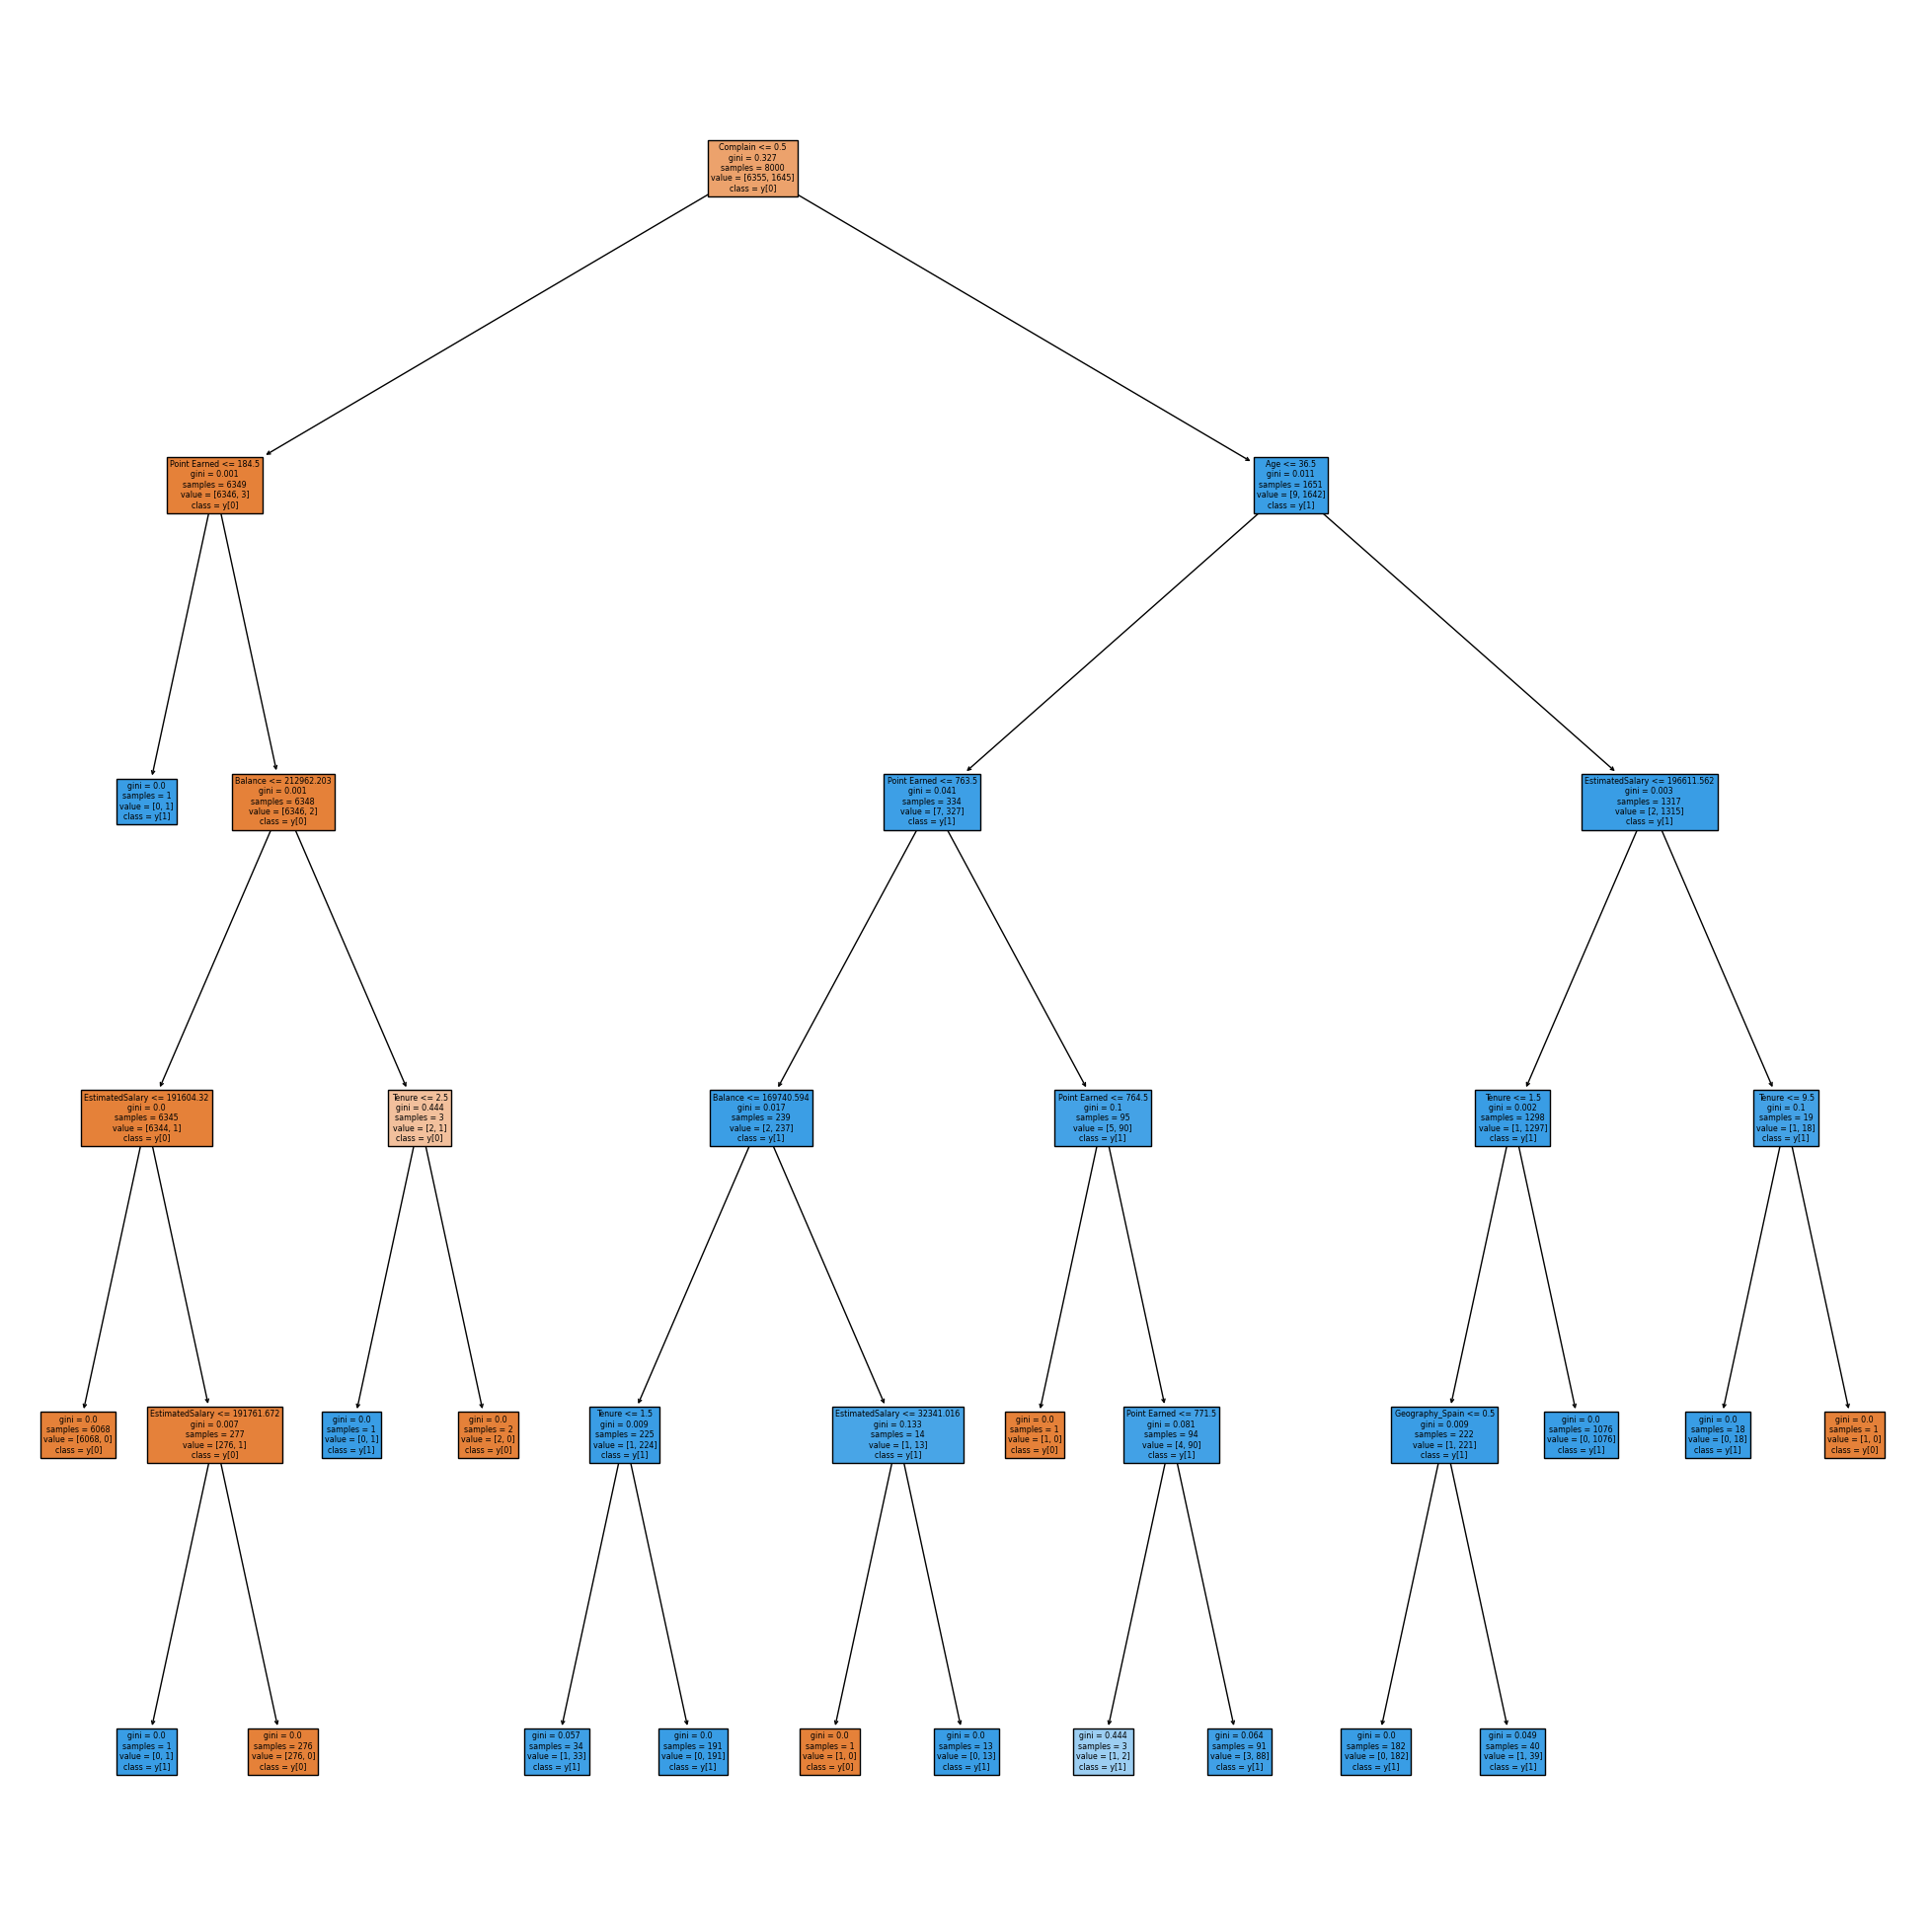

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt

# 訓練決策樹模型
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

# 預測並計算準確率
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# 畫出決策樹
fig, ax = plt.subplots(figsize=(25, 25))  # 調整圖的大小
tree.plot_tree(model, ax=ax, feature_names=X.columns, class_names=True, filled=True)
plt.show()
